<a href="https://colab.research.google.com/github/ajay152603/Python-for-DS/blob/master/ML_session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

In this lecture, we plan to cover some of the machine learning principles and one or two algorithms.

--------

Loading libraries
-------------


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Loading the machine learning packages
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier #classification techniques
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split #
from sklearn.metrics import mean_absolute_error,accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Visualizing overfitting

In [123]:
# Loading the candy data from an url
candy_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/candy-data.csv"
candy_data = pd.read_csv (candy_url)
candy_data.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [0]:
# Extracting the features and label
x = candy_data.drop(['winpercent', 'competitorname'], axis = 1)
y = candy_data['winpercent']


In [0]:
# x.head(4)
# y.head(5)

In [126]:
# Splitting the data into train and test 
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 123)

# Instantiating the classifier 
rfr = RandomForestRegressor(n_estimators= 30,
                       random_state =1111,
                       max_features =4)

# Fitting the instantiator 
rfr.fit(x_train, y_train)

print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(x_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(x_test))))

The training error is 4.02
The testing error is 8.56


# Visualizing the effect of parameter tuning

In [127]:
# Loading the tic_tac data from an url 
tic_tac_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/tic-tac-toe_csv.csv"
tic_tac_data = pd.read_csv(tic_tac_url)

# Printing the dimensions of tic tac data 
tic_tac_data.shape

(958, 10)

In [128]:
# Printing the first few rows of the tic tac data
tic_tac_data.head()
# Observe the column named class 

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [0]:
# Renaming the class column as target 
tic_tac_data.rename(columns={'class': 'target'},inplace= True)
# class is a reserved word

In [130]:
# Printing the head of the tic tac data 
tic_tac_data.head()
# Observe the class is renamed as target 


,TL,TM,TR,ML,MM,MR,BL,BM,BR,target
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [131]:
# Creating a mapping for x and o in the tic tac data 
mapping_for_moves = {'x':1, "o":0}  # For b, we put mean of the data

# Counting the unique values in target column 
tic_tac_data.target.value_counts()

True     626
False    332
Name: target, dtype: int64

In [132]:
mapping_for_moves

{'o': 0, 'x': 1}

In [0]:
tic_tac_data.target=tic_tac_data.target.apply(lambda x: 0 if x == False else 1)

In [134]:
tic_tac_data.target.value_counts()

1    626
0    332
Name: target, dtype: int64

In [0]:

y= tic_tac_data['target']



In [0]:
tic_tac_data =tic_tac_data.drop(['target'], axis=1)


In [0]:
# Creating a mapping for  tic tac data 
for i in  tic_tac_data.columns :
  tic_tac_data[i] = tic_tac_data[i].map(mapping_for_moves)


In [138]:
# Printing the head of the tic tac data 
tic_tac_data.head()
# Observe the 0,1 and NaN in the tic tac data 

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN


In [0]:
# Imputing the missing valus in the features 
x = SimpleImputer().fit_transform(tic_tac_data)

In [0]:
x_train, x_test, y_train,  y_test = train_test_split(x,y, test_size = 0.20 , random_state =123)

In [0]:
from sklearn.metrics import accuracy_score

In [142]:
test_scores, train_scores = [] , []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
  rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
  rfc.fit(x_train, y_train) # print(rfc)

  train_predictions = rfc.predict(x_train)
  test_predictions = rfc.predict(x_test)

  train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
  test_scores.append(round(accuracy_score(y_test, test_predictions),2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
# plot the loss as well 

The training scores were: [0.95, 0.93, 0.98, 0.99, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.77, 0.8, 0.89, 0.89, 0.88, 0.96, 0.99, 1.0]


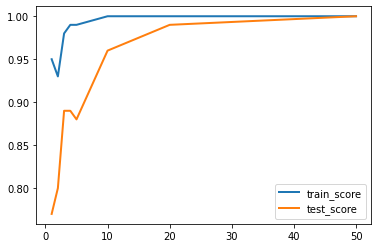

In [143]:
   z = [1, 2, 3, 4, 5, 10, 20, 50]
   plt.plot( z , train_scores, linewidth = 2 )
   plt.plot( z , test_scores, linewidth = 2 )
   plt.legend(['train_score', 'test_score'], loc='lower right')


# Visualizing the effect of feature normalization
-----------------------------------

In [144]:
toy_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/toy_data.csv"
data_set = pd.read_csv(toy_url) 
data_set.head() 

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,1000,Yes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a3e706080>,
      dtype=object)

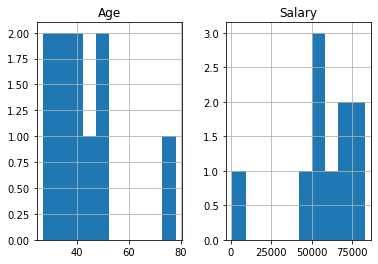

In [145]:
data_set.hist()

In [0]:
from sklearn import preprocessing 

In [147]:

# here Features - Age and Salary columns  
# are taken using slicing 
# to handle values with varying magnitude 
x = data_set.iloc[ :, 1:3].values

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
print ("\nAfter min max Scaling : \n \n", x_after_min_max_scaler) 



After min max Scaling : 
 
 [[0.33333333 0.86585366]
 [0.         0.57317073]
 [0.05882353 0.64634146]
 [0.21568627 0.73170732]
 [0.25490196 0.        ]
 [0.15686275 0.69512195]
 [1.         0.62195122]
 [0.41176471 0.95121951]
 [0.45098039 1.        ]
 [0.19607843 0.80487805]]


In [148]:
standardization =preprocessing.StandardScaler()
x_after_standardization =standardization.fit_transform(x)
print ("\nAfter Standardisation : \n", x_after_standardization) 


After Standardisation : 
 [[ 0.09536935  0.66527061]
 [-1.15176827 -0.43586695]
 [-0.93168516 -0.16058256]
 [-0.34479687  0.16058256]
 [-0.1980748  -2.59226136]
 [-0.56487998  0.02294037]
 [ 2.58964459 -0.25234403]
 [ 0.38881349  0.98643574]
 [ 0.53553557  1.16995867]
 [-0.41815791  0.43586695]]


# Extreme Gradient Boosting with XGBoost

In [0]:
# Loading the dataset
diabetes_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/diabetes.csv"
diabetes_data = pd.read_csv(diabetes_url)

In [150]:
# Printing the columns of the data 
diabetes_data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [151]:
# Printing the shape of the data 
diabetes_data.shape

(768, 9)

In [152]:
# Print the first few rows of the data 
diabetes_data.head(4)
#diabetes_data.iloc[[50,100,150]]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [153]:
# Printing the types of data in the dataset 
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [154]:
# Checking for missing values
print(diabetes_data.isna().sum())

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64


In [155]:
#checking for diabetic patients
diabetes_data.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

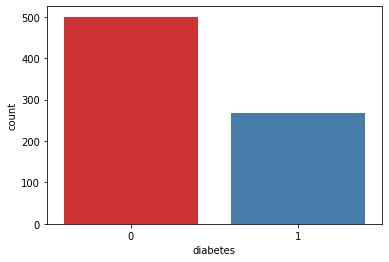

In [156]:
# Plotting the value counts in Customer_Segment
sns.countplot(diabetes_data['diabetes'], palette='Set1' )
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a3c672ac8>,
      dtype=object)

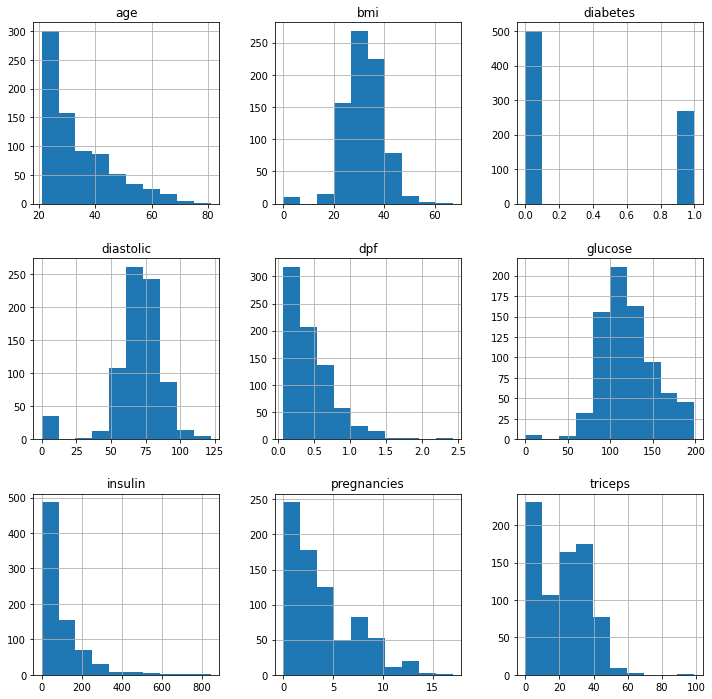

In [157]:
diabetes_data.hist(figsize= [12,12])

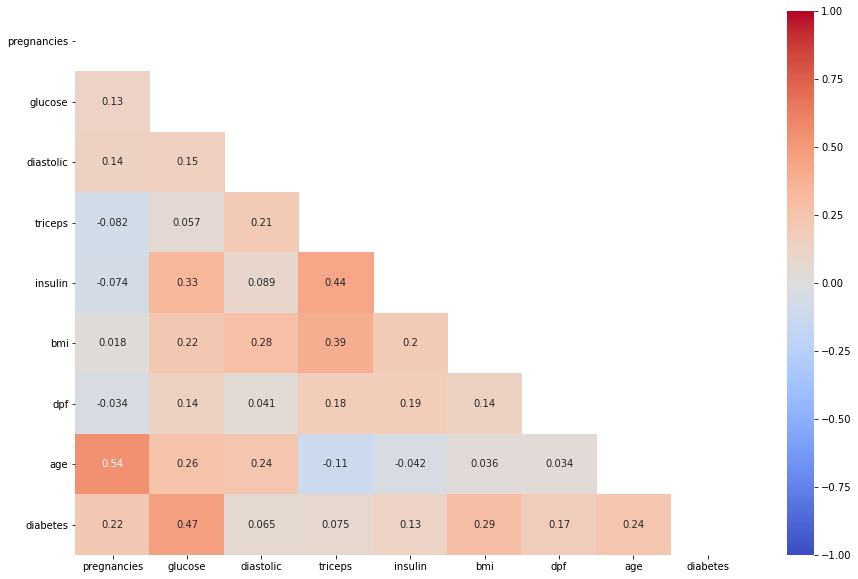

In [158]:
# Visualizing the correlation matrix 
plt.figure(figsize=(15,10))
mask = np.zeros_like(diabetes_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(diabetes_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask
            )
# plt.savefig('corr-matrix.png')
plt.show()

In [0]:
# separate the labels and the features - method 1 
# diabetes_data.shape
labels = diabetes_data["diabetes"]
features = diabetes_data.drop(["diabetes"], axis= 1)


In [0]:
# do the scaling or normalization
# leaving to anayse the effect normalization of accuracy later 

ss = StandardScaler()
features =ss.fit_transform(features)

In [0]:
# split data into X and y
x_train, x_test, y_train,y_test=train_test_split ( features , labels, test_size = 0.20 , random_state  = 123)

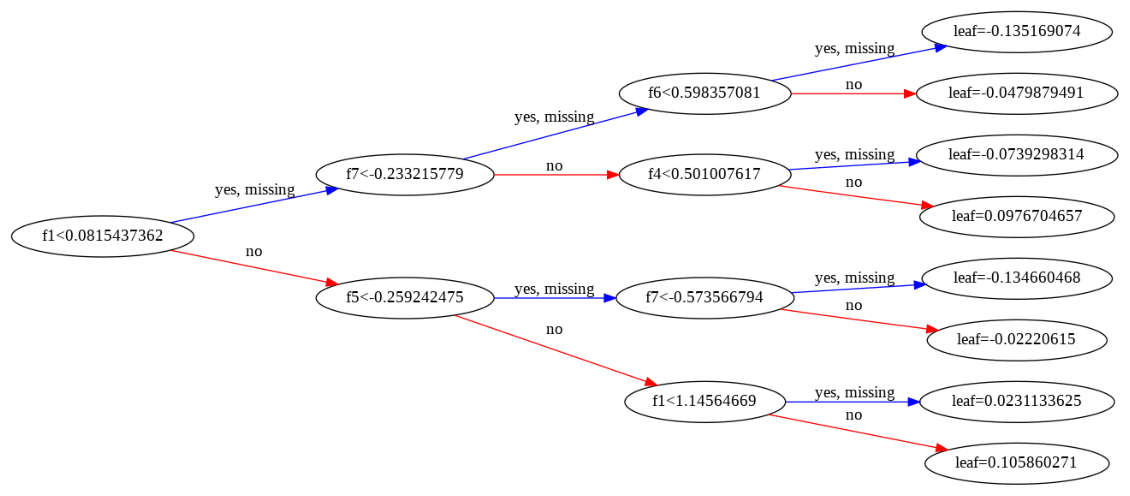

In [178]:
from xgboost import plot_tree as plot_tree
xgb_clf= xgb.XGBClassifier(learning_rate= 0.1)

xgb_clf.fit (x_train,y_train)
plot_tree(xgb_clf , num_trees= 3, rankdir= 'LR' )
fig = plt.gcf() # to solve low resolution problem ##gcf = get current figure
fig.set_size_inches(20, 20) # # to solve low resolution problem
plt.show()

In [179]:
pre_dict=xgb_clf.predict(x_train)
accuracy_pre = accuracy_score(y_train, pre_dict)
print(np.round(accuracy_pre*100, 2), '%')

88.76 %


In [180]:
pre_dict=xgb_clf.predict(x_test)
accuracy_pre = accuracy_score(y_test, pre_dict)
print(np.round(accuracy_pre*100, 2), '%')

78.57 %


In [190]:
 print (confusion_matrix (y_test, pre_dict)) 

print ('-' *60)

print(classification_report(y_test , pre_dict))





[[79 17]
 [16 42]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.83        96
           1       0.71      0.72      0.72        58

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



# Demystifying classification report

* Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

* Precision = $\frac{TP}{TP + FP}$

* Recall = $\frac{TP}{TP + FN}$

* f1-score = $\frac{2 * Recall * Precision}{Recall + Precision}$

---
### Plotting an ROC curve
----
A Receiver Operating Characteristic (ROC) curve is a graph with the x-axis values as the **False Positive Rate** (FPR) and the y-axis values as the **True Positive Rate** (TPR). The Area Under the Curve (AUC) for the ROC represents how capable a model is at correctly classifying a sample. 

* True Positive Rate = True Positives / (True Positives + False Negatives)
* False Positive Rate = False Positives / (False Positives + True Negatives)

References: 

* https://kite.com/python/answers/how-to-plot-an-roc-curve-in-python 
* https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ 

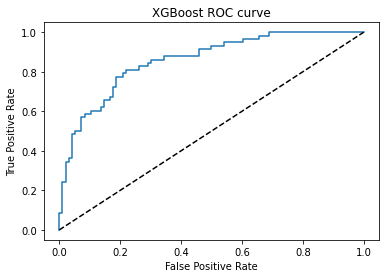

In [192]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(x_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()